<a href="https://colab.research.google.com/github/VictorHerbert/MachineLearning/blob/master/Notebooks/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sn
import numpy as np

plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.grid'] = True

# Preparing data

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [0]:
'https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d'

#[2,6,8,16,18,20,22]
#plt.imshow(x_train[4],cmap = plt.colormaps()[2])

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

input_shape = (28, 28, 1)

## Layers

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [0]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape, activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.sigmoid))

# Training

In [0]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

model.fit(
    x_train,
    y_train,
    epochs=1
)

model.save('mnist_model.h5')

Epoch 1/1
60000/60000 [==============================] - 37s 621us/step - loss: 0.2100 - accuracy: 0.9378


# Recovering

In [0]:
model = load_model('mnist_model.h5')

10000/10000 [==============================] - 2s 186us/step


[0.058222962200734765, 0.9804999828338623]

# Testing

10000/10000 [==============================] - 2s 201us/step
[0.058222962200734765, 0.9804999828338623]


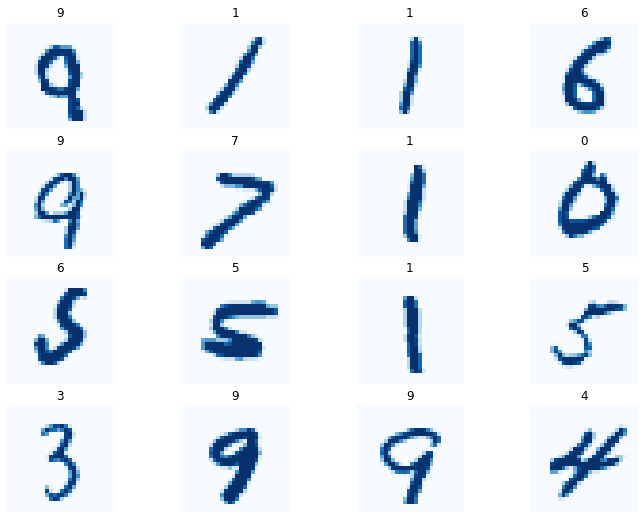

In [0]:
import random as rd

print(model.evaluate(x_test, y_test))

m,n = [4,4]

plt.figure(figsize=(12,9))
for j in range(m*n):
  i = rd.randint(0,x_test.shape[0])
  plt.subplot(m,n,j+1)
  plt.title(f'{np.argmax(model.predict(x_test[i:i+1]))}')
  plt.axis('off')
  plt.imshow(x_test[i].reshape(28,28),cmap = plt.colormaps()[2])

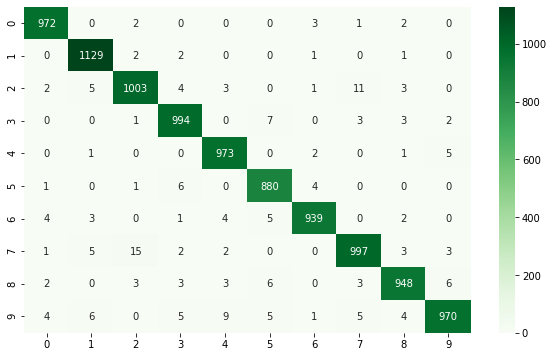

In [0]:
from sklearn import metrics

pred = np.argmax(model.predict(x_test), axis=1)
cm = metrics.confusion_matrix(y_test, pred)

df_cm = pd.DataFrame(cm, index = [i for i in range(0,10)],
                  columns = [i for i in range(0,10)])


sn.heatmap(df_cm, annot=True,  fmt='d', cmap=plt.colormaps()[16])